In [0]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Q1 Read the input file and check the data dimension

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [0]:
cr_data = pd.read_csv('/content/drive/My Drive/Great_Lakes_Assignments/Lab External | Residency 4/german_credit.csv')

In [4]:
cr_data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [0]:
# Print Shape of model data

In [5]:
cr_data.shape

(1000, 21)

In [7]:
cr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [9]:
cr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [10]:
cat_col =  [col_name for col_name in cr_data.columns    if cr_data[col_name].dtypes == 'object']
cat_col

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [0]:
dummies_cr_data = pd.get_dummies(data=cr_data, columns=cat_col, drop_first=True)

In [16]:
dummies_cr_data.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/television,purpose_repairs,purpose_retraining,savings_... < 100 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/ no savings account,present_emp_since_... < 1 year,present_emp_since_1 <= ... < 4 years,present_emp_since_4 <= ... < 7 years,present_emp_since_unemployed,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,personal_status_sex_male : single,other_debtors_guarantor,other_debtors_none,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1
3,0,42,7882,2,4,45,1,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,1,24,4870,3,4,53,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1


In [17]:
dummies_cr_data.shape

(1000, 49)

### Check for highly correlated variables but don't required any treatment for this use case

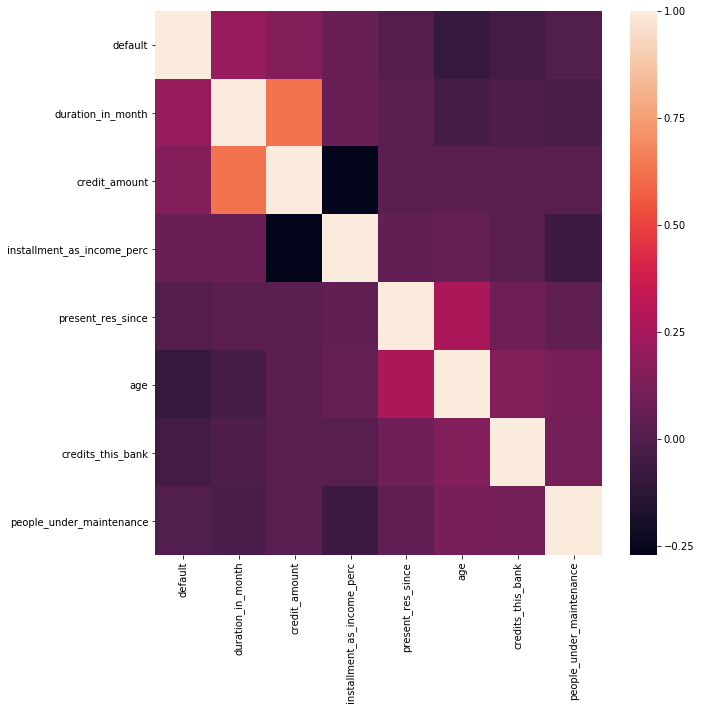

In [20]:
plt.figure(figsize=(10,10))
cr_corr = cr_data.corr()
sns.heatmap(cr_corr);

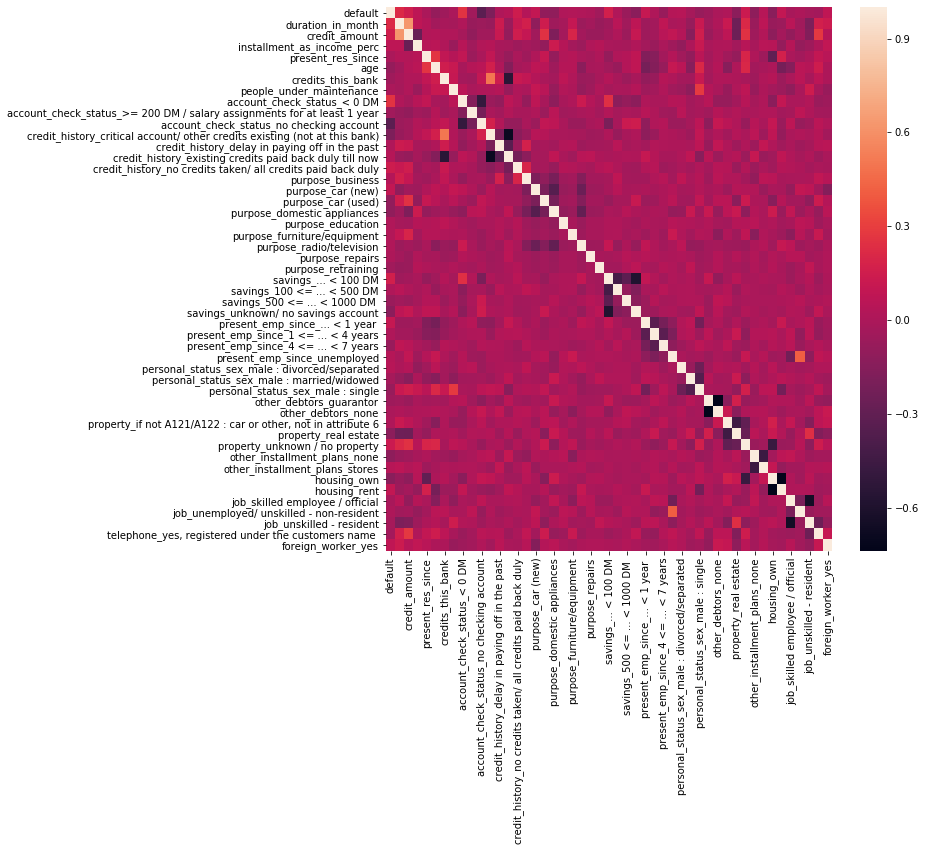

In [21]:
plt.figure(figsize=(10,10))
cr_corr_dummies = dummies_cr_data.corr()
sns.heatmap(cr_corr_dummies);

### Drop the original variables which are converted to dummy

In [0]:
# We have already dropped the original varibles which are converted to dummy by drop_first=True while converting to dummies in above step

In [25]:
dummies_cr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_< 0 DM                                                   1000 non-null uint8
account_chec

In [0]:
# We can see that the below columns are already deleted
#['account_check_status','credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors',
# 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
X=dummies_cr_data.drop('default',axis=1, inplace=False)
Y=dummies_cr_data['default']
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state = 10)

In [27]:
X_train.shape

(700, 48)

In [28]:
X_test.shape

(300, 48)

In [30]:
y_train.shape

(700,)

In [31]:
y_test.shape

(300,)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf_model = RandomForestClassifier(n_estimators = 500, n_jobs=2, criterion='entropy', random_state=9999)

In [34]:
rf_model.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [35]:
rf_model.score(X=X_test, y=y_test)

0.7366666666666667

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [0]:
prediction = rf_model.predict(X_test)

In [39]:
confusion_matrix(y_test, prediction)

array([[190,  13],
       [ 66,  31]])

In [40]:
accuracy_score(y_test, prediction)

0.7366666666666667

### Q6 Show the list of the features importance( 1 Marks)

In [42]:
feature_imp = rf_model.feature_importances_
col_names = dummies_cr_data.columns
for col in range(0, len(feature_imp)):
  print()
  print(col_names[col])
  print(feature_imp[col])


default
0.08130013582843434

duration_in_month
0.11251983990460752

credit_amount
0.040345477868335713

installment_as_income_perc
0.03898385817687508

present_res_since
0.0888863489044352

age
0.021190520876167445

credits_this_bank
0.012804860237071848

people_under_maintenance
0.03852628095442305

account_check_status_< 0 DM
0.009017713365418968

account_check_status_>= 200 DM / salary assignments for at least 1 year
0.06495367667318747

account_check_status_no checking account
0.02216533279705487

credit_history_critical account/ other credits existing (not at this bank)
0.009382875321778074

credit_history_delay in paying off in the past
0.01546854546860246

credit_history_existing credits paid back duly till now
0.01229915943955296

credit_history_no credits taken/ all credits paid back duly
0.011889463507548891

purpose_business
0.020263901126102653

purpose_car (new)
0.011663954297944475

purpose_car (used)
0.015175489222349401

purpose_domestic appliances
0.003558816603122538

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc

In [0]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [0]:
kfold = KFold(num_folds, True, seed)
rf_model_kfold = RandomForestClassifier(n_estimators = 500, n_jobs=2, criterion='entropy', random_state=9999,)

In [0]:
def compute_roc_auc(index):
    y_predict = rf_model_kfold.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(Y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [0]:
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores, accuracy = [], [], [], []
    
for (train, test), i in zip(kfold.split(X, Y), range(5)):
    rf_model_kfold.fit(X.iloc[train], Y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    acc = accuracy_score(rf_model_kfold.predict(X.iloc[test]), Y.iloc[test])
    accuracy.append(acc)

In [54]:
results = pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
results

,AUC Train,AUC Test
0,1.0,0.815202
1,1.0,0.831229
2,1.0,0.750248
3,1.0,0.760198
4,1.0,0.772727


In [0]:
#Calculate Mean score

In [58]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Mean score: ', accuracy.mean())


Accuracy Score
Mean score:  0.772


In [0]:
# Calculate score standard deviation using std()

In [57]:
print('Standard deviation: ', accuracy.std())

Standard deviation:  0.07573638491504596


# Q8 Print the confusion matrix( 1 Marks)

In [0]:
prediction_kfold = rf_model_kfold.predict(X_test)

In [61]:
confusion_matrix(y_test, prediction_kfold)

array([[202,   1],
       [ 10,  87]])

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [0]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_true=y_test, y_pred=prediction_kfold))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       203
           1       0.99      0.90      0.94        97

    accuracy                           0.96       300
   macro avg       0.97      0.95      0.96       300
weighted avg       0.96      0.96      0.96       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

In [0]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

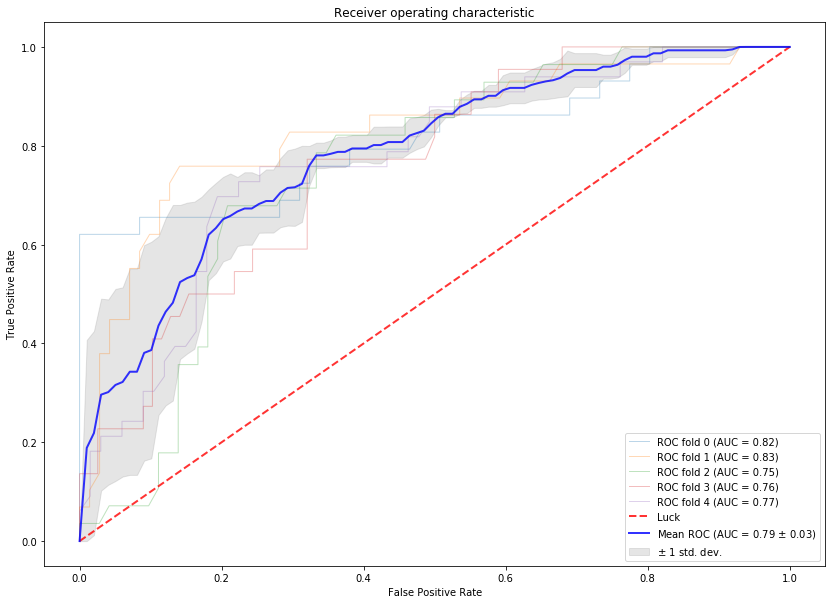

In [68]:
plot_roc_curve(fprs, tprs);

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [69]:
auc(fpr, tpr)

0.7727272727272727

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 15
accuracy = []
rf_model_bonus = RandomForestClassifier(n_estimators = 500, n_jobs=2, criterion='entropy', random_state=9999)

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rf_model_bonus.fit(X_, y_)
    y_pred = rf_model_bonus.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [77]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.730888888888889
Standard deviation:  0.011186411509913962
